#**Proyecto 1 - Final**
Esta semana, finalizarás tu proyecto de predicción de ventas. El objetivo de esto es ayudar al minorista a comprender las propiedades de los productos y puntos de venta que juegan un papel crucial en el aumento de las ventas.

Para finalizar este proyecto, tu tarea es mejorar tu modelo para predecir las ventas y preparar una presentación corta (5-10 minutos) sobre tu proyecto.

* ¿Puedes utilizar otros métodos (por ejemplo, bosques aleatorios) para mejorar tu modelo para predecir las ventas?
* Finaliza tu README con una descripción general del proyecto, una explicación de los datos (incluidas las visualizaciones) y un resumen de los resultados y recomendaciones. Piensa en esto como un resumen ejecutivo o una descripción general de tu proyecto.
* Prepara una presentación corta (de 5 a 10 minutos). Grábate a ti mismo dando esta presentación. No dudes en utilizar cualquier software disponible (Zoom, OBS, etc.). Incluye esta grabación en tu repositorio de GitHub.
* Asegúrate de que tu repositorio de GitHub esté organizado y sea profesional. Recuerda, esto debe usarse para mostrar tus habilidades y habilidades en ciencia de datos.

Registra todo tu trabajo en GitHub y entrega un enlace a tu repositorio de GitHub con tu proyecto final. Asegúrate de incluir las diapositivas de tu presentación y la grabación en tu repositorio de GitHub también.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Separar en train y test
from sklearn.model_selection import train_test_split
# Para escalar datos
from sklearn.preprocessing import StandardScaler
# Regresión KNN
from sklearn.neighbors import KNeighborsRegressor
# Regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Random forest
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
from sklearn import metrics


In [3]:
# Importar una librería
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Cargar la data
df = pd.read_csv('/content/drive/MyDrive/CODING_DOJO/PTCienciaDeDatos/PandasParaManipulaciónDeDatos/sales_predictions.csv')

##**Limpieza de datos**

In [5]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Observaciones sobre data:**

In [149]:
df.groupby(['Outlet_Type'])[['Item_Weight','Outlet_Size','Item_Identifier']].count()
#Se compara con Item Identifier porque es una variable que tiene observaciones completas
#En grocery store falta más de la mitad de las observaciones del peso del producto y el tamaño de la tienda
#En el Supermarket Type1 faltan observaciones del tamaño de la tienda
#En el Supermarket Type3 no hay datos sobre el peso del producto

,Item_Weight,Outlet_Size,Item_Identifier
Outlet_Type,,,
Grocery Store,1083,1083,1083
Supermarket Type1,5577,5577,5577
Supermarket Type2,928,928,928
Supermarket Type3,935,935,935


In [10]:
#El etiquetado de los datos no tiene el mismo formato y puede llevar a conclusiones erroneas
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF','low fat'],['Low Fat','Low Fat'])
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'],['Regular'])

Sabemos que en la data original existe missing values por lo que se imputan las observaciones faltantes

In [6]:
# Imputacion de datos faltantes
#df['Outlet_Size']=df.fillna(df.mode().iloc[0])
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])
#Se lleno los vacios con la moda
df['Item_Weight']=df['Item_Weight'].interpolate(method = 'linear')
#Se hizo una interpolacion lineal

In [7]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


##**Gráficos**

Podemos ver la distribución de cada una de las variables numéricas y la relacion que tiene con las demás variables.
*  Podemos ver que el peso, la visibilidad y las ventas tienen una distribución normal.

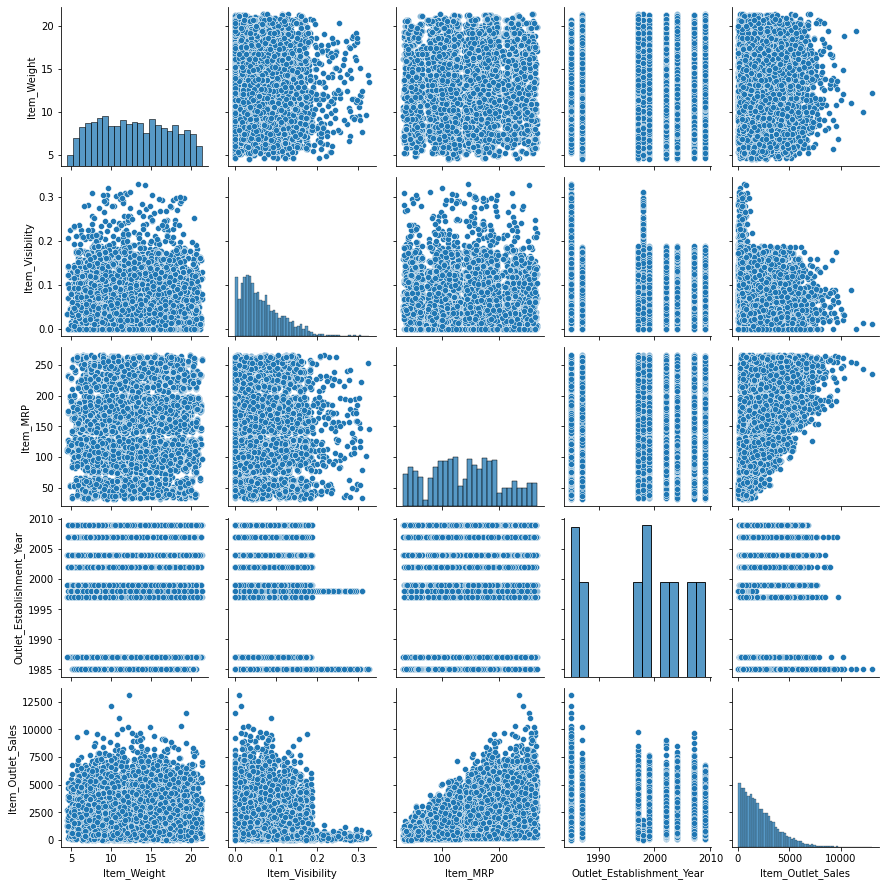

In [11]:
sns.pairplot(df)

In [12]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012240,0.024839,0.001220,0.014536
Item_Visibility,-0.012240,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024839,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.001220,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014536,-0.128625,0.567574,-0.049135,1.000000


Al momento de evaluar las correlaciones de las ventas con las demás variables numéricas se ve que el precio minorista máximo del producto es el que tiene la mayor correlación con las ventas.

In [12]:
df.corr()['Item_Outlet_Sales'].sort_values()

Item_Visibility             -0.128625
Outlet_Establishment_Year   -0.049135
Item_Weight                  0.014536
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

##**Variedad de productos**




En esta sección vemos los locales que tienen mas tipos de items unicos. Aquí se identifica la variedad de productos que ofrece el minorista por tamaño de local, tipo de local y tipo de área en el que se encuentra el local. 
Las conclusiones son:
* El Supermercado tipo 1 es el que tiene una demanda un poco más particular ya que hay más variedad. 
* Los locales medianos son los que tienen más variedad.
* No hay una clara distinción entre la ubicación de los locales y la variedad.


Text(0.5, 1.0, 'Cantidad de productos unicos por local')

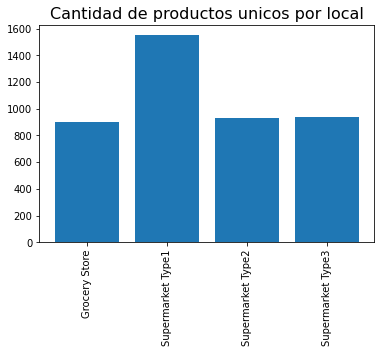

In [13]:
localtipe = df.groupby(['Outlet_Type'])['Item_Identifier'].nunique()
plt.bar(localtipe.index, localtipe.values);
plt.xticks(rotation = 90);
plt.title('Cantidad de productos unicos por local', fontsize = 16)

Text(0.5, 1.0, 'Cantidad de productos unicos por tamaño de local')

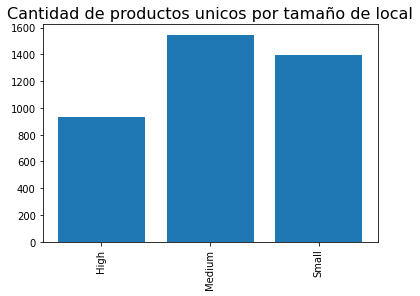

In [59]:
localsize = df.groupby(['Outlet_Size'])['Item_Identifier'].nunique()
plt.bar(localsize.index, localsize.values);
plt.xticks(rotation = 90);
plt.title('Cantidad de productos unicos por tamaño de local', fontsize = 16)

Text(0.5, 1.0, 'Cantidad de productos unicos por locacion del local')

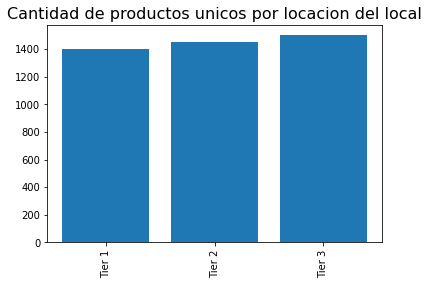

In [62]:
localocation = df.groupby(['Outlet_Location_Type'])['Item_Identifier'].nunique()
plt.bar(localocation.index, localocation.values);
plt.xticks(rotation = 90);
plt.title('Cantidad de productos unicos por locacion del local', fontsize = 16)

Consistente con el gráfico anterior, la mayoria de ventas viene los supermercados tipo 1. Se ve que con el doble de productos unicos genera más del doble de ventas que los demás supermercados.

##**Ventas**

En esta sección vemos los locales que tienen mas ventas. Aquí se identifica las ventas totales que tiene el minorista por tamaño de local, tipo de local y tipo de área en el que se encuentra el local. 
Las conclusiones son:
* El Supermercado tipo 1 es el que tiene más ventas. Sin embargo, el promedio de ventas del Supermercado tipo 3 es mayor (menos frecuencia, mayor cantidad). Igualmente en este supermercado es donde se dan las ventas por producto más altas (en el box plot se ven outliers y el cuarto cuartil está más alto). Esta variable potencialmente genera una variación en las ventas.
* Los locales medianos son los que venden más. Se ve que generan más ventas pero la distribución es similar que en los locales de distintos tamaños.
* Los locales ubicados en el tier 3 venden más. Se ve que generan más ventas pero la distribución es similar que en los locales de las otras ubicaciones.

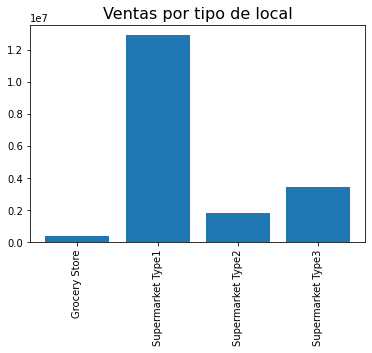

In [63]:
sales = df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum()
plt.bar(sales.index, sales.values);
plt.xticks(rotation = 90);
plt.title('Ventas por tipo de local', fontsize = 16)
plt.show()

No handles with labels found to put in legend.


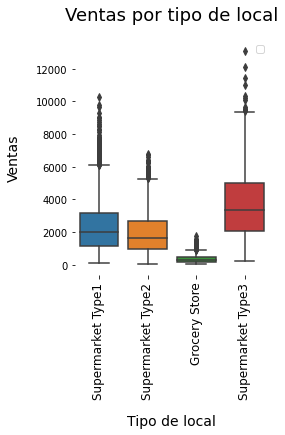

In [53]:
sns.catplot(data=df, kind='box', x='Outlet_Type', y='Item_Outlet_Sales', sharey=True, height=4)
plt.title('Ventas por tipo de local', fontsize=18, pad=20)
plt.xticks(fontsize=12, rotation=90)
plt.xlabel('Tipo de local', fontsize=14, labelpad=15)
plt.ylabel('Ventas', fontsize=14, labelpad=15)
sns.despine(left=True, bottom=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()


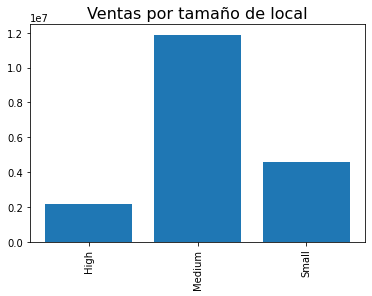

In [64]:
sales_size = df.groupby(['Outlet_Size'])['Item_Outlet_Sales'].sum()
plt.bar(sales_size.index, sales_size.values);
plt.xticks(rotation = 90);
plt.title('Ventas por tamaño de local', fontsize = 16)
plt.show()

No handles with labels found to put in legend.


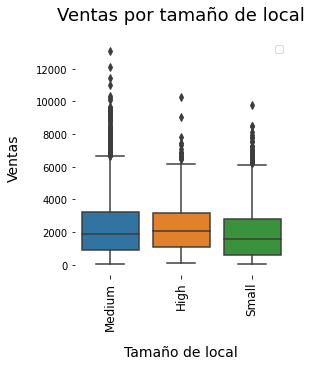

In [69]:
sns.catplot(data=df, kind='box', x='Outlet_Size', y='Item_Outlet_Sales', sharey=True, height=4)
plt.title('Ventas por tamaño de local', fontsize=18, pad=20)
plt.xticks(fontsize=12, rotation=90)
plt.xlabel('Tamaño de local', fontsize=14, labelpad=15)
plt.ylabel('Ventas', fontsize=14, labelpad=15)
sns.despine(left=True, bottom=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()


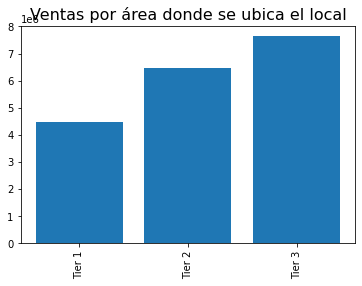

In [65]:
sales_loc = df.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].sum()
plt.bar(sales_loc.index, sales_loc.values);
plt.xticks(rotation = 90);
plt.title('Ventas por área donde se ubica el local', fontsize = 16)
plt.show()

No handles with labels found to put in legend.


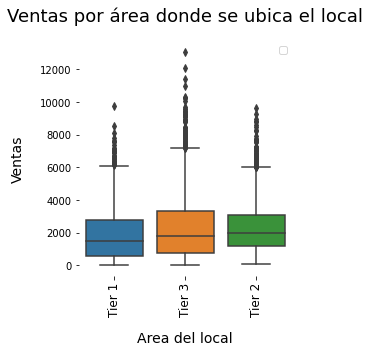

In [68]:
sns.catplot(data=df, kind='box', x='Outlet_Location_Type', y='Item_Outlet_Sales', sharey=True, height=4)
plt.title('Ventas por área donde se ubica el local', fontsize=18, pad=20)
plt.xticks(fontsize=12, rotation=90)
plt.xlabel('Area del local', fontsize=14, labelpad=15)
plt.ylabel('Ventas', fontsize=14, labelpad=15)
sns.despine(left=True, bottom=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()


El local que genera mas ventas es el 27. En general la venta promedio es superior que en los otros locales. El valor maximo de venta es superior que los demás. Los locales 13, 45, 17, 46, 35 y 49 tienen valores maximos y minimos de venta y promedio de venta similares.

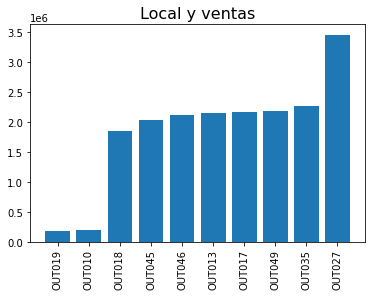

In [19]:
localsales = df.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum()
sorted_idx = localsales.values.argsort()
plt.bar(localsales.index[sorted_idx], localsales.values[sorted_idx]);
plt.xticks(rotation = 90);
plt.title('Local y ventas', fontsize = 16)
plt.show()

No handles with labels found to put in legend.


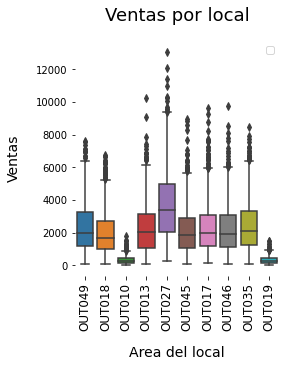

In [21]:
sns.catplot(data=df, kind='box', x='Outlet_Identifier', y='Item_Outlet_Sales', sharey=True, height=4)
plt.title('Ventas por local', fontsize=18, pad=20)
plt.xticks(fontsize=12, rotation=90)
plt.xlabel('Area del local', fontsize=14, labelpad=15)
plt.ylabel('Ventas', fontsize=14, labelpad=15)
sns.despine(left=True, bottom=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

##**Tipos de productos**

En todos los tipos de locales por tipo, tamaño y locación se vende la misma cantidad de productos regulares y bajos en grasa. Los productos que más se venden en los locales son los productos bajos en grasa.

<Figure size 720x432 with 0 Axes>

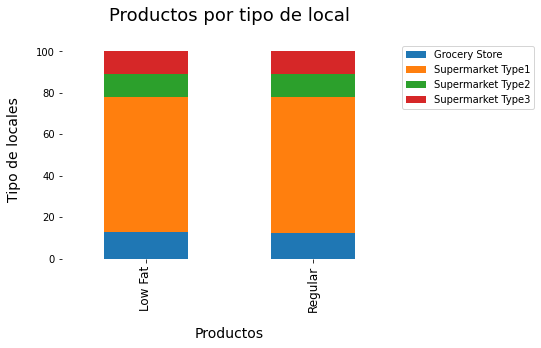

In [70]:
itemtipe=df.groupby(['Item_Fat_Content','Outlet_Type'])['Outlet_Type'].count().unstack('Outlet_Type')
plt.figure(figsize=(10, 6))
itemtipe = itemtipe.apply(lambda x: x*100/sum(x), axis=1)
p1=itemtipe.plot(kind="bar",stacked=True)
plt.title('Productos por tipo de local', fontsize=18, pad=20)
plt.xticks(fontsize=12, rotation=90)
plt.xlabel('Productos', fontsize=14, labelpad=15)
plt.ylabel('Tipo de locales', fontsize=14, labelpad=15)
sns.despine(left=True, bottom=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

<Figure size 720x432 with 0 Axes>

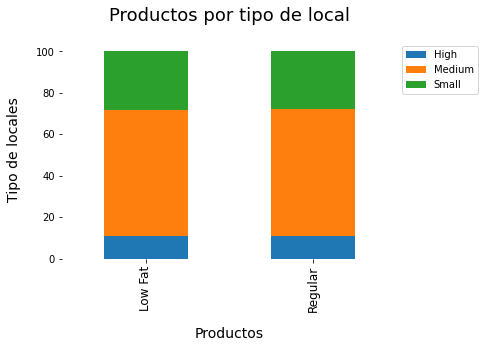

In [73]:

itemsize=df.groupby(['Item_Fat_Content','Outlet_Size'])['Outlet_Size'].count().unstack('Outlet_Size')
plt.figure(figsize=(10, 6))
itemsize = itemsize.apply(lambda x: x*100/sum(x), axis=1)
p1=itemsize.plot(kind="bar",stacked=True)
plt.title('Productos por tipo de local', fontsize=18, pad=20)
plt.xticks(fontsize=12, rotation=90)
plt.xlabel('Productos', fontsize=14, labelpad=15)
plt.ylabel('Tipo de locales', fontsize=14, labelpad=15)
sns.despine(left=True, bottom=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

<Figure size 720x432 with 0 Axes>

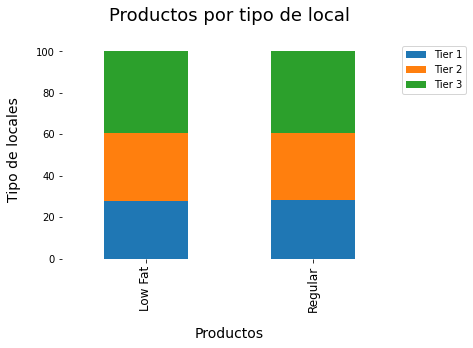

In [72]:

itemloc=df.groupby(['Item_Fat_Content','Outlet_Location_Type'])['Outlet_Location_Type'].count().unstack('Outlet_Location_Type')
plt.figure(figsize=(10, 6))
itemloc = itemloc.apply(lambda x: x*100/sum(x), axis=1)
p1=itemloc.plot(kind="bar",stacked=True)
plt.title('Productos por tipo de local', fontsize=18, pad=20)
plt.xticks(fontsize=12, rotation=90)
plt.xlabel('Productos', fontsize=14, labelpad=15)
plt.ylabel('Tipo de locales', fontsize=14, labelpad=15)
sns.despine(left=True, bottom=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [28]:
fat = df.groupby(['Item_Fat_Content'])['Item_Identifier'].nunique()


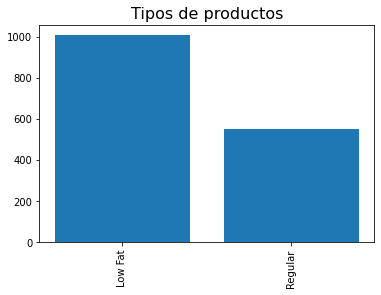

In [24]:
plt.bar(fat.index, fat.values);
plt.xticks(rotation = 90);
plt.title('Tipos de productos', fontsize = 16)
plt.show()

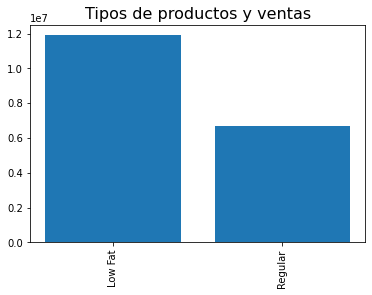

In [15]:
fatsales = df.groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].sum()
plt.bar(fatsales.index, fatsales.values);
plt.xticks(rotation = 90);
plt.title('Tipos de productos y ventas', fontsize = 16)
plt.show()

Los productos que generan más ventas son:

* Frutas y Vegetales
* Snacks
* Hogar
* Comida congelada
* Comida diaria

La composicion de estos productos en los distintos locales es la misma.

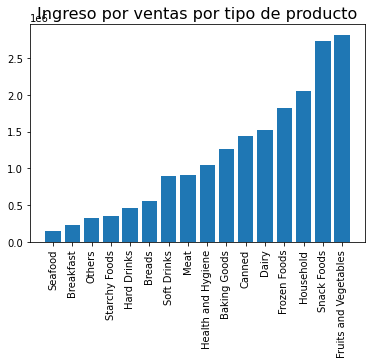

In [74]:
itemtipe = df.groupby(['Item_Type'])['Item_Outlet_Sales'].sum()
sorted_idx = itemtipe.values.argsort()
plt.bar(itemtipe.index[sorted_idx], itemtipe.values[sorted_idx]);
plt.xticks(rotation = 90);
plt.title('Ingreso por ventas por tipo de producto', fontsize = 16)
plt.show()

<Figure size 720x432 with 0 Axes>

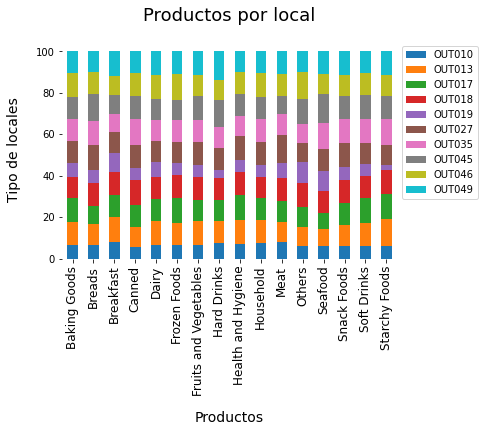

In [24]:
itemtipe=df.groupby(['Item_Type','Outlet_Identifier'])['Outlet_Identifier'].count().unstack('Outlet_Identifier')
plt.figure(figsize=(10, 6))
itemtipe = itemtipe.apply(lambda x: x*100/sum(x), axis=1)
p1=itemtipe.plot(kind="bar",stacked=True)
plt.title('Productos por local', fontsize=18, pad=20)
plt.xticks(fontsize=12, rotation=90)
plt.xlabel('Productos', fontsize=14, labelpad=15)
plt.ylabel('Tipo de locales', fontsize=14, labelpad=15)
sns.despine(left=True, bottom=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

##**Modelo para predecir las ventas**

In [50]:
df.corr()['Item_Outlet_Sales'].sort_values()

Item_Visibility             -0.128625
Outlet_Establishment_Year   -0.049135
Item_Weight                  0.014536
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

###*De las caracteristicas numéricas se van a tomar las siguientes variables:*
* Item_Weight
* Item_Visibility
* Item_MRP 

In [25]:
numerical_features = df.select_dtypes(include = [np.number]).columns
numerical_features

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

###*De las caracteristicas categoricas se van a tomar las siguientes variables:*
* Item_Fat_Content
* Item_Type
* Outlet_Identifier
* Outlet_Size
* Outlet_Location_Type
* Outlet_Type

In [26]:
categorical_features = df.select_dtypes(include = [np.object]).columns
categorical_features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [86]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [77]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [78]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [79]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [80]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [81]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [82]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [51]:
X = df.loc[:, ['Item_Weight', 'Item_MRP', 'Item_Fat_Content', 'Item_Type','Outlet_Type','Outlet_Identifier']]

In [115]:
X_var = df.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Establishment_Year'], axis = 'columns').columns
X = df.loc[:, X_var]

In [116]:
X = pd.get_dummies(X)

In [117]:
X

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
4,8.930,0.000000,53.8614,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
8519,8.380,0.046982,108.1570,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
8520,10.600,0.035186,85.1224,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
8521,7.210,0.145221,103.1332,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0


In [118]:
X.shape

(8523, 41)

In [119]:
y = df.loc[:, ['Item_Outlet_Sales']]

In [120]:
#Dividir en prueba y entrenamiento
X_train, X_test, y_train, y_test =train_test_split(X,
                                                   y,
                                                   test_size=0.2)

##**Regresión lineal**

In [121]:
# Definir modelo
ols = LinearRegression(fit_intercept=True)

# Estimar modelo
ols.fit(X_train, y_train)

LinearRegression()

**Información del modelo**

In [122]:
print("Intercept:", ols.intercept_)
print("Coeficiente:", list(zip(X.columns, ols.coef_.flatten(), )))


Intercept: [-218.2844278]
Coeficiente: [('Item_Weight', -0.3453246284350389), ('Item_Visibility', -180.40832429510314), ('Item_MRP', 15.57762486002413), ('Item_Fat_Content_Low Fat', -5.6613396110026954), ('Item_Fat_Content_Regular', 5.6613396110026555), ('Item_Type_Baking Goods', 0.6833646147644677), ('Item_Type_Breads', -1.7120123156315388), ('Item_Type_Breakfast', 36.556736533612735), ('Item_Type_Canned', 57.45586809531932), ('Item_Type_Dairy', -57.74252884086401), ('Item_Type_Frozen Foods', -33.844301636831034), ('Item_Type_Fruits and Vegetables', 27.227948576187163), ('Item_Type_Hard Drinks', -22.125484407027916), ('Item_Type_Health and Hygiene', -34.20513435715972), ('Item_Type_Household', -39.95153118452677), ('Item_Type_Meat', 17.472973878981847), ('Item_Type_Others', -35.70281359000147), ('Item_Type_Seafood', 102.01275585112056), ('Item_Type_Snack Foods', -13.283876180776188), ('Item_Type_Soft Drinks', -36.12671063683958), ('Item_Type_Starchy Foods', 33.284745599673556), ('Outl

**Predicción**

In [123]:
y_pred = ols.predict(X_test)

**Bondad de ajuste**

In [124]:
print("Coeficiente de determinación R^2:", ols.score(X_test, y_test))

Coeficiente de determinación R^2: 0.571173351119068


El modelo puede explicar el 57.11% de la variabilidad observada en la variable de ventas.

In [125]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 825.490814023877
Mean Squared Error: 1242585.544282021
Root Mean Squared Error: 1114.7132116746536


Para mejorar el modelo se puede hacer distintas pruebas ingresando y sacando las variables explicativas. Dentro de las pruebas de bondad de ajuste se deben evaluar los distintos estadisticos como R2, RMSE. y pruebas F para significancia conjunta.


In [126]:
print("Coeficiente:", list(zip(X.columns, ols.coef_.flatten(), )))

Coeficiente: [('Item_Weight', -0.3453246284350389), ('Item_Visibility', -180.40832429510314), ('Item_MRP', 15.57762486002413), ('Item_Fat_Content_Low Fat', -5.6613396110026954), ('Item_Fat_Content_Regular', 5.6613396110026555), ('Item_Type_Baking Goods', 0.6833646147644677), ('Item_Type_Breads', -1.7120123156315388), ('Item_Type_Breakfast', 36.556736533612735), ('Item_Type_Canned', 57.45586809531932), ('Item_Type_Dairy', -57.74252884086401), ('Item_Type_Frozen Foods', -33.844301636831034), ('Item_Type_Fruits and Vegetables', 27.227948576187163), ('Item_Type_Hard Drinks', -22.125484407027916), ('Item_Type_Health and Hygiene', -34.20513435715972), ('Item_Type_Household', -39.95153118452677), ('Item_Type_Meat', 17.472973878981847), ('Item_Type_Others', -35.70281359000147), ('Item_Type_Seafood', 102.01275585112056), ('Item_Type_Snack Foods', -13.283876180776188), ('Item_Type_Soft Drinks', -36.12671063683958), ('Item_Type_Starchy Foods', 33.284745599673556), ('Outlet_Identifier_OUT010', -69

Las variables que están asociadas a mas ventas son:
**Item_MRP** 
**Item_Fat_content:** Regular 
**Item_Type:** Breakfast, Canned, Fruits and Vegetables, Seafood, Starchy Foods 
**Outlet Size:** small
**Outlet_Type_Tier:** tier 2 y 3 
**Outlet_Type_Supermarket:** Type 1 y Type 3 

##**KNN Regresion**

In [140]:
#Crear instancia del modelo
knn = KNeighborsRegressor(n_neighbors =10 )
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [141]:
#Y predicho
y_pred = knn.predict(X_test)

In [142]:
#score
knn.score(X_test,y_test)

0.37513949976488636

La variacion de las ventas está explicado en un 37% por las variables explicativas.

In [143]:
#score
knn.score(X_train,y_train)

0.509750455412963

##**Random Forest**

In [164]:
# Lista de valores para probar el parametro n_estimators
estimator_range = [1] + list(range(10, 210, 10))
np.array(estimator_range)

array([  1,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200])

In [165]:
# Lista para almacenar las precisiones promedio para cada valor de n_estimators:
scores = []
for estimator in estimator_range:
  rfor_regress = RandomForestRegressor(n_estimators = estimator, bootstrap = True, random_state = 2731)
  rfor_regress.fit(X_train, y_train)
  score = rfor_regress.score(X_train, y_train)
  scores.append(score)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vect

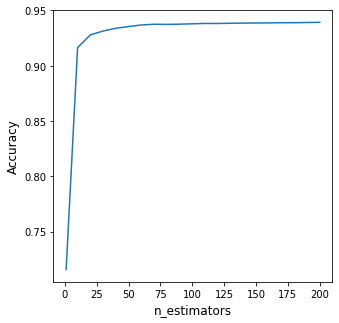

In [166]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5))
axes.plot(estimator_range, scores)
axes.set_xlabel('n_estimators', fontsize = 12)
axes.set_ylabel('Accuracy', fontsize = 12);

In [167]:
#Crear una instancia del modelo
clf = RandomForestRegressor(n_estimators = 100, bootstrap=True, random_state = 0)

In [168]:
#Entrenar el modelo en los datos, almacenando la información aprendida.
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(random_state=0)

In [169]:
# calcular la precisión de clasificación para el modelo que se entrenó
score = clf.score(X_test, y_test)
score

0.566063118692634

In [170]:
# calcular la precisión de clasificación para el modelo de train
score = clf.score(X_train, y_train)
score

0.9380540492132836

In [161]:
# Prediccion
clf.predict(X_test)

array([1558.218346, 2434.238038, 5501.57198 , ..., 2096.877178,
        205.126322, 4084.969294])